In [137]:

import os
import pandas as pd
import numpy as np
import missingno as msno 
import matplotlib.pyplot as plt

### Dataset initial

In [138]:
curr_path = os.getcwd()
pik_raw ='CW_HistoricalEmissions_PIK.csv' # file name
path = os.path.dirname('Data\ClimateWatch_HistoricalEmissions\\')
dataframe=pd.read_csv(os.path.join(path, pik_raw))
dataframe.head()

,country,sector,gas,1850,1851,1852,1853,1854,1855,1856,...,2012,2013,2014,2015,2016,2017,2018,2019,source,unit
0,ABW,Agriculture,CH4,0.000050,0.000051,0.000052,0.000053,0.000054,0.000055,0.000057,...,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,0.001280,PIK,MtCO2e
1,ABW,Agriculture,KYOTOGHG,0.000054,0.000055,0.000057,0.000058,0.000059,0.000060,0.000061,...,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,0.002160,PIK,MtCO2e
2,ABW,Agriculture,N2O,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,...,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,0.000882,PIK,MtCO2e
3,ABW,Energy,CH4,0.000199,0.000196,0.000195,0.000197,0.000199,0.000201,0.000209,...,0.004775,0.014075,0.011150,0.008200,0.005225,0.002230,0.001483,0.001497,PIK,MtCO2e
4,ABW,Energy,CO2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.350000,0.862000,0.873000,0.899000,0.884000,0.932000,0.962000,0.995000,PIK,MtCO2e


In [139]:
dataframe.shape

(4730, 175)

In [140]:
dataframe.columns

Index(['country', 'sector', 'gas', '1850', '1851', '1852', '1853', '1854',
       '1855', '1856',
       ...
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       'source', 'unit'],
      dtype='object', length=175)

<div class="alert alert-info">-Ce tableau contient les valeurs de gaz pour les années entre 1850 et 2019.
</div>

In [141]:
dataframe.gas.unique()

array(['CH4', 'KYOTOGHG', 'N2O', 'CO2', 'F-Gas'], dtype=object)

In [142]:
dataframe.sector.unique()

array(['Agriculture', 'Energy', 'Industrial Processes and Product Use',
       'Other', 'Total excluding LULUCF', 'Waste'], dtype=object)

In [143]:
dataframe.country.unique()

array(['ABW', 'AFG', 'AGO', 'AIA', 'ALB', 'AND', 'ANNEXI', 'ANT', 'AOSIS',
       'ARE', 'ARG', 'ARM', 'ATA', 'ATG', 'AUS', 'AUT', 'AZE', 'BASIC',
       'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH',
       'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF',
       'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COK',
       'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI',
       'DMA', 'DNK', 'DOM', 'DZA', 'WORLD', 'ECU', 'EGY', 'ERI', 'ESP',
       'EST', 'ETH', 'EUU', 'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR',
       'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM',
       'GUY', 'HKG', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL',
       'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ',
       'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN',
       'LBR', 'LBY', 'LCA', 'LDC', 'LIE', 'LKA', 'LSO', 'LTU', 'LUX',
       'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEX', 'MHL',
       'MKD

In [144]:
dataframe.unit.unique()

array(['MtCO2e'], dtype=object)

In [145]:
dataframe.source.unique()

array(['PIK'], dtype=object)

In [146]:
#nombre de lignes dupliquées
print(df.duplicated().sum())

0


### Transformation du dataframe

In [187]:
df=dataframe.copy()

In [188]:
# utiliser melt pour transformer les colonnes des années
df = df.melt(id_vars=['country', 'sector', 'gas', 'unit', 'source'], var_name='year', value_name='value')
# afficher le dataframe transformé
print(df.head())



  country       sector       gas    unit source  year     value
0     ABW  Agriculture       CH4  MtCO2e    PIK  1850  0.000050
1     ABW  Agriculture  KYOTOGHG  MtCO2e    PIK  1850  0.000054
2     ABW  Agriculture       N2O  MtCO2e    PIK  1850  0.000005
3     ABW       Energy       CH4  MtCO2e    PIK  1850  0.000199
4     ABW       Energy       CO2  MtCO2e    PIK  1850  0.000000


In [189]:
df.shape

(804100, 7)

<AxesSubplot: >

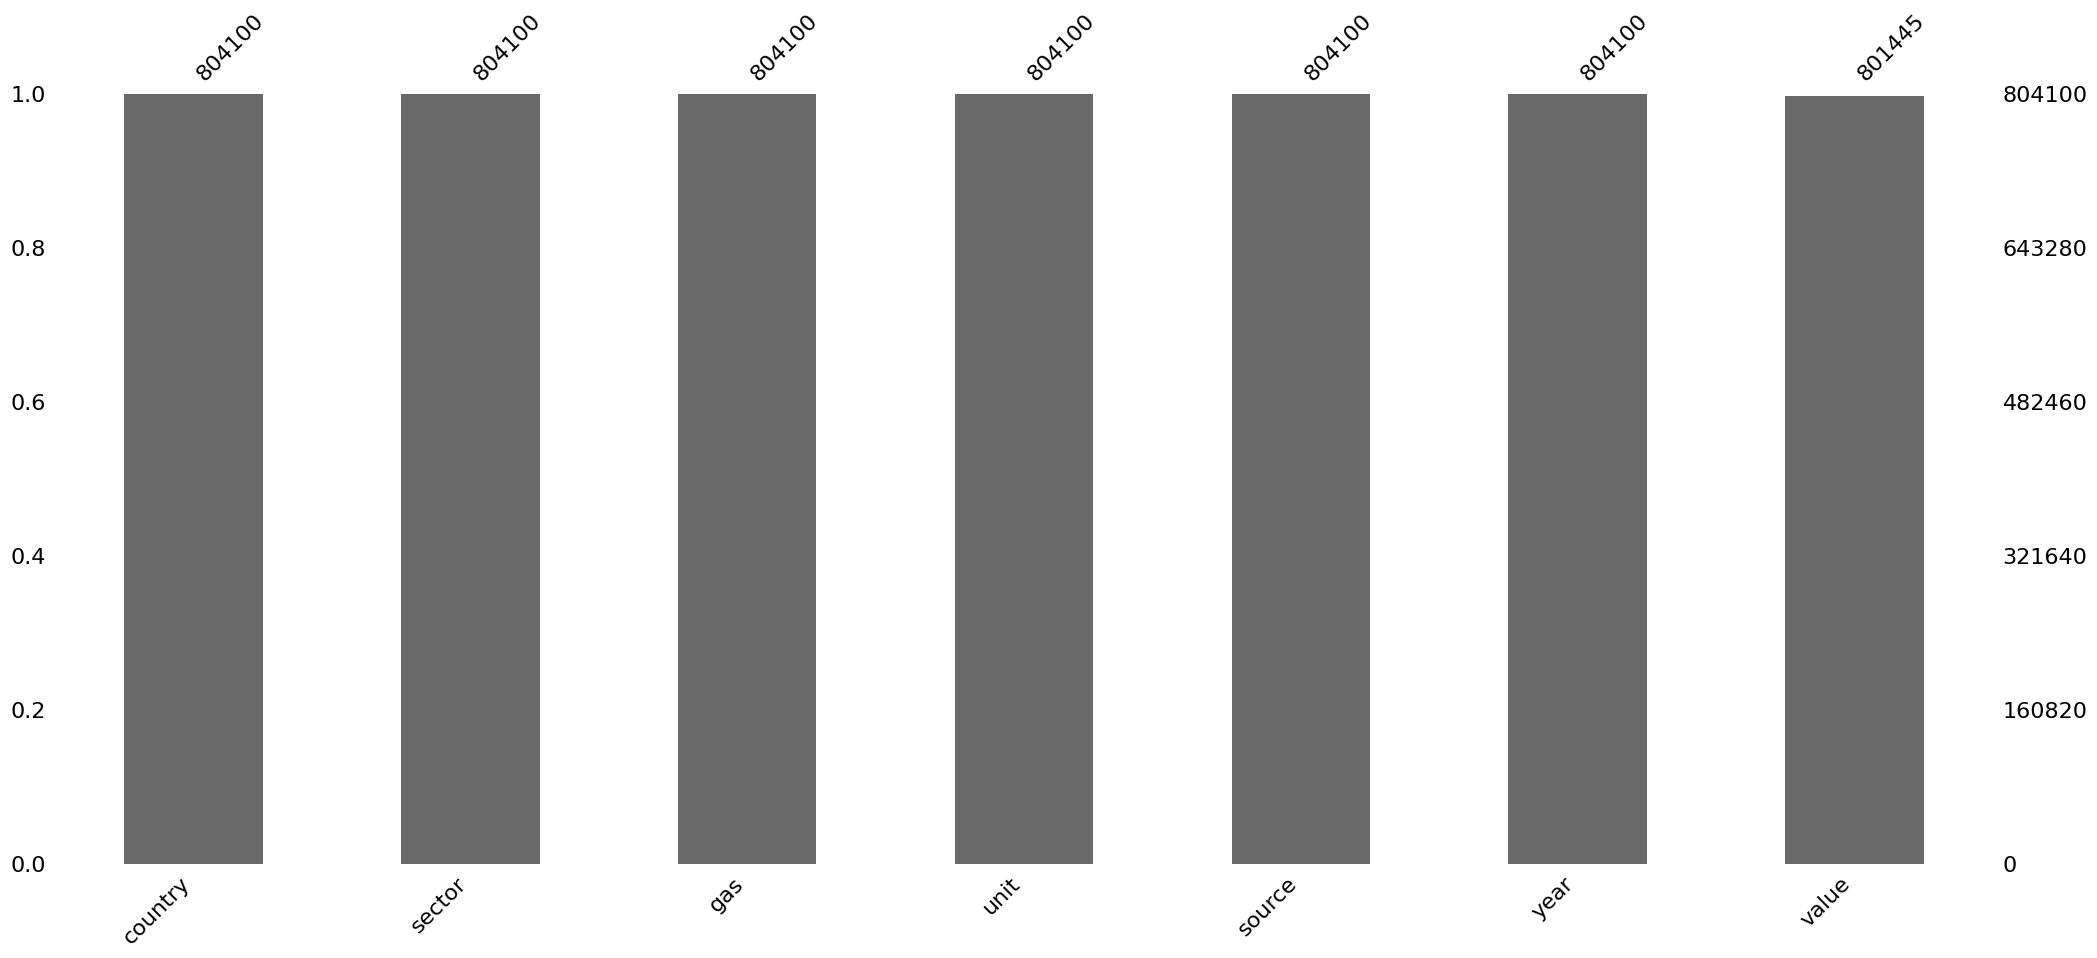

In [149]:
#afficher le taux des valeurs non nulles
msno.bar(df)

In [190]:
#pourcentage des valeurs nulles
df.isna().mean() * 100

country    0.000000
sector     0.000000
gas        0.000000
unit       0.000000
source     0.000000
year       0.000000
value      0.330183
dtype: float64

<div class="alert alert-info">-Plus que 0.33% des valeurs manquantes gloablement pour les années
</div>

In [153]:
# définir la période ici on prend 10 ans pour decennie
interval_size = 10
years=list(dataframe.columns[3:173])
# créer des sous-listes de pas de 10
decennies = []
for i in range(0, len(years), interval_size):
    decennie = years[i:i+interval_size]
    decennies.append(decennie)
# afficher la liste des decennies crées
print(decennies)

[['1850', '1851', '1852', '1853', '1854', '1855', '1856', '1857', '1858', '1859'], ['1860', '1861', '1862', '1863', '1864', '1865', '1866', '1867', '1868', '1869'], ['1870', '1871', '1872', '1873', '1874', '1875', '1876', '1877', '1878', '1879'], ['1880', '1881', '1882', '1883', '1884', '1885', '1886', '1887', '1888', '1889'], ['1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899'], ['1900', '1901', '1902', '1903', '1904', '1905', '1906', '1907', '1908', '1909'], ['1910', '1911', '1912', '1913', '1914', '1915', '1916', '1917', '1918', '1919'], ['1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929'], ['1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939'], ['1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949'], ['1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959'], ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969'], ['1970', '1971'

In [161]:
def get_decennie_label(year):
    """ Return the decennie group label (int) associé à l'année. """
    for i in range(len(decennies)):
        if year in decennies[i]:
            return(i+1)
        

In [191]:
#ajout de la variable Decennie_RANGE 
df['Decennie_RANGE'] = df['year'].apply(lambda x: get_decennie_label(x))
df.head()

,country,sector,gas,unit,source,year,value,Decennie_RANGE
0,ABW,Agriculture,CH4,MtCO2e,PIK,1850,0.000050,1
1,ABW,Agriculture,KYOTOGHG,MtCO2e,PIK,1850,0.000054,1
2,ABW,Agriculture,N2O,MtCO2e,PIK,1850,0.000005,1
3,ABW,Energy,CH4,MtCO2e,PIK,1850,0.000199,1
4,ABW,Energy,CO2,MtCO2e,PIK,1850,0.000000,1


In [163]:
df['Decennie_RANGE'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int64)

Decennie_RANGE
1     0.465116
2     0.443975
3     0.443975
4     0.443975
5     0.443975
6     0.443975
7     0.443975
8     0.443975
9     0.443975
10    0.443975
11    0.443975
12    0.395349
13    0.126850
14    0.101480
15    0.042283
16    0.042283
17    0.000000
Name: value, dtype: float64


Text(0.5, 1.0, 'Pourcentage de valeurs nulles pour la variable "value" par décennie')

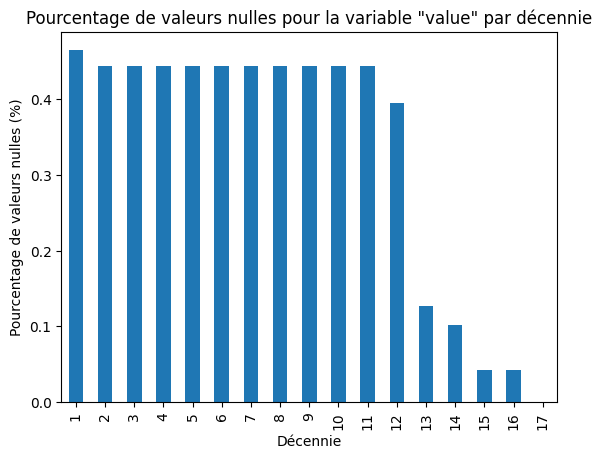

In [178]:
# grouper les données par 'decennie_range' et calculer le pourcentage de valeurs nulles pour 'value'
null_percentages = df.groupby('Decennie_RANGE')['value'].apply(lambda x: (x.isnull().mean())*100)

# afficher les résultats
print(null_percentages)

# créer un graphique à barres
null_percentages.plot(kind='bar')
plt.xlabel('Décennie')
plt.ylabel('Pourcentage de valeurs nulles (%)')
plt.title('Pourcentage de valeurs nulles pour la variable "value" par décennie')


<div class="alert alert-info">-Gobalement le taux des nan pour les valeurs de gaz est faible.<br>
-Depuis 4 décennies (13) plus précisement depuis 1970 ,presque toutes les valeurs sont bien remplies.<br>
==>possibilité de supprimer les lignes correpondantes.
</div>

In [205]:
# Trouver l'émission de gaz maximale par décennie
max_values = df.groupby('Decennie_RANGE')['value'].max()

# Trouver les pays, secteurs et gaz associés aux valeurs maximales
idx = df.groupby(['Decennie_RANGE'])['value'].transform(max) == df['value']
countries = df.loc[idx, 'country']
sectors = df.loc[idx, 'sector']
gases = df.loc[idx, 'gas']
ys=df.loc[idx, 'year']

# Transformer les résultats en dataframe
result = pd.DataFrame({
    'Decennie_RANGE': max_values.index,
    'value': max_values.values,
    'country': countries.values,
    'sector': sectors.values,
    'gas': gases.values,
    'year': ys.values
}).rename(columns={'value': 'valeur_max'}).sort_values('valeur_max', ascending=True)

# Afficher le résultat
result

,Decennie_RANGE,valeur_max,country,sector,gas,year
0,1,1660.0,WORLD,Total excluding LULUCF,KYOTOGHG,1859
1,2,1980.0,WORLD,Total excluding LULUCF,KYOTOGHG,1869
2,3,2410.0,WORLD,Total excluding LULUCF,KYOTOGHG,1879
3,4,3060.0,WORLD,Total excluding LULUCF,KYOTOGHG,1889
4,5,4000.0,WORLD,Total excluding LULUCF,KYOTOGHG,1899
5,6,5380.0,WORLD,Total excluding LULUCF,KYOTOGHG,1909
6,7,6240.0,WORLD,Total excluding LULUCF,KYOTOGHG,1917
7,8,7480.0,WORLD,Total excluding LULUCF,KYOTOGHG,1929
8,9,8070.0,WORLD,Total excluding LULUCF,KYOTOGHG,1939
9,10,10200.0,WORLD,Total excluding LULUCF,KYOTOGHG,1948


<div class="alert alert-info">-Les gaz à effet de serre sont les plus émis dans le monde.<br>
    -Cette émission croit au fil des années.<br>
 - Ces gaz comprennent le dioxyde de carbone (CO2), le méthane (CH4), le protoxyde d'azote (N2O), les hydrofluorocarbures (HFC), les perfluorocarbures (PFC) et l'hexafluorure de soufre (SF6). <br>
    -"KYOTOGHG" fait référence aux gaz à effet de serre (GES) inclus dans le protocole de Kyoto, un accord international sur la réduction des émissions de gaz à effet de serre.<br>
</div>